In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 #library of Python bindings designed to solve computer vision problems
import os 
from random import shuffle 
from tqdm import tqdm #for progress bar
from PIL import Image

In [3]:
train_folder= '../env/chest_xray/train/'
val_folder = '../env/chest_xray/val/'
test_folder = '../env/chest_xray/test/'

In [4]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-0689-0001.jpeg
pneumonia picture title: person13_bacteria_50.jpeg


Text(0.5, 1.0, 'Pneumonia')

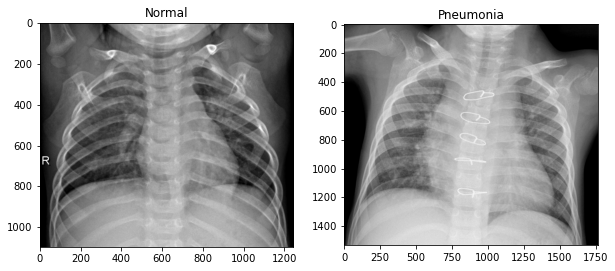

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))   #generating random index
norm_pic = os.listdir(train_n)[rand_norm]     #getting random pic
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#plotting the imgs
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)      #.add_subplot(height ,width ,subplot 1)
img_plot = plt.imshow(norm_load, cmap="gray")
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)   #.add_subplot(height ,width ,subplot 2)
img_plot = plt.imshow(sic_load, cmap="gray")
a2.set_title('Pneumonia')

In [6]:
train_n='../env/chest_xray/train/NORMAL/'
train_p='../env/chest_xray/train/PNEUMONIA/'
test_n='../env/chest_xray/test/NORMAL/'
test_p='../env/chest_xray/test/PNEUMONIA/'

100%|██████████████████████████████████████████████████████████████████████████████| 1341/1341 [01:42<00:00, 13.11it/s]


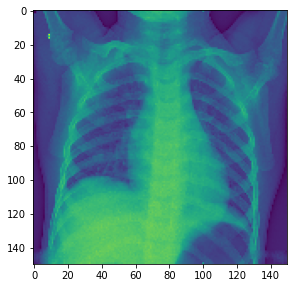

In [7]:
image_size=150
for img in tqdm(os.listdir(train_n)):
    path=os.path.join(train_n, img)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))

In [8]:
import os
image_size=150

In [9]:
def train_data():
    train_data_normal=[]
    train_data_pneumonia=[]
    for img1 in tqdm(os.listdir(train_n)):
        path=os.path.join(train_n, img1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_normal.append(img1)
    for img2 in tqdm(os.listdir(train_p)):
        path=os.path.join(train_p, img2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_pneumonia.append(img2)
    train_data= np.concatenate((np.asarray(train_data_normal),np.asarray(train_data_pneumonia)),axis=0)
    return train_data 

In [10]:
def test_data():
    test_data_normal=[]
    test_data_pneumonia=[]
    for img1 in tqdm(os.listdir(test_n)):
        path=os.path.join(test_n, img1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_normal.append(img1)
    for img2 in tqdm(os.listdir(test_p)):
        path=os.path.join(test_p, img2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_pneumonia.append(img2)
    test_data= np.concatenate((np.asarray(test_data_normal),np.asarray(test_data_pneumonia)),axis=0)
    return test_data 

In [11]:
train_data = train_data() 
test_data = test_data()

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:10<00:00, 37.78it/s]


In [12]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))   #normalization

In [13]:
train_data.shape

(5216, 150, 150)

In [14]:
z1 = np.zeros(1341)  # 0-> normal (train)
o1 = np.ones(3875)   # 1-> pneumonia  (train)
Y_train = np.concatenate((z1, o1), axis=0)
z = np.zeros(234)  # 0-> normal (test)
o = np.ones(390)   # 1-> pneumonia  (test)
Y_test = np.concatenate((z, o), axis=0)

In [15]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [16]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (5840, 150, 150)
Y shape:  (5840, 1)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
print("Number of training examples: " +str(x_train.shape[0]))
print("Number of testing examples: " +str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 4964
Number of testing examples: 876
x_train shape: (4964, 150, 150)
y_train shape: (4964, 1)
x_test shape: (876, 150, 150)
y_test shape: (876, 1)


In [18]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T
y_train = y_train.T
y_test = y_test.T

print("x_train_flatten: ",x_train_flatten.shape)
print("x_test_flatten: ",x_test_flatten.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train_flatten:  (22500, 4964)
x_test_flatten:  (22500, 876)
y_train:  (1, 4964)
y_test:  (1, 876)


In [19]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [20]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [21]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    #forward propagation
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    #backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [22]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        #update
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [23]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction


In [24]:
def model(x_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(x_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, x_test)
    Y_prediction_train = predict(w, b, x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [25]:
d = model(x_train_flatten, y_train, x_test_flatten, y_test, num_iterations = 3500, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.403824
Cost after iteration 200: 0.335287
Cost after iteration 300: 0.299285
Cost after iteration 400: 0.276433
Cost after iteration 500: 0.260277
Cost after iteration 600: 0.248063
Cost after iteration 700: 0.238408
Cost after iteration 800: 0.230529
Cost after iteration 900: 0.223946
Cost after iteration 1000: 0.218344
Cost after iteration 1100: 0.213506
Cost after iteration 1200: 0.209278
Cost after iteration 1300: 0.205545
Cost after iteration 1400: 0.202221
Cost after iteration 1500: 0.199239
Cost after iteration 1600: 0.196547
Cost after iteration 1700: 0.194101
Cost after iteration 1800: 0.191867
Cost after iteration 1900: 0.189818
Cost after iteration 2000: 0.187930
Cost after iteration 2100: 0.186184
Cost after iteration 2200: 0.184562
Cost after iteration 2300: 0.183051
Cost after iteration 2400: 0.181639
Cost after iteration 2500: 0.180316
Cost after iteration 2600: 0.179072
Cost after iteration 2700: 0.177901
Cost

Normal


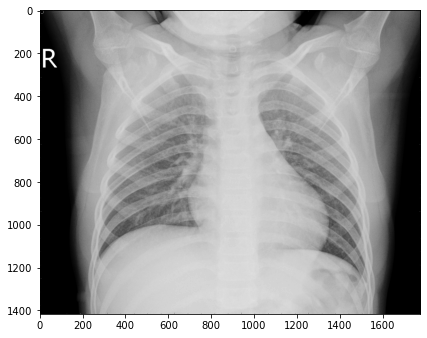

In [68]:
my_image = "NORMAL2-IM-1427-0001.jpeg"
val = "../env/chest_xray/val/NORMAL/"

path=os.path.join(val, my_image)
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
img = cv2.resize(img, (image_size, image_size))
img_flatten = img.reshape(1, image_size*image_size).T
my_predicted_image = predict(d["w"], d["b"], img_flatten)

if my_predicted_image==0:
    print("Normal")
else:
    print("Pneumonia")
    

image=Image.open(path)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")